In [1]:
import os
import pickle
from glob import glob
import torch
import torch.nn as nn
import torch.optim as optim
import torch.jit
from tqdm.notebook import tqdm
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

from support import *

In [2]:
tyv = [pickle.load(open(f, 'rb')) for f in glob('./result-50p/*.pkl')]
tyv = [item.result for sublist in tyv for item in sublist]

In [3]:
uls = []
rfwls = []
heu = []
with open('./samples-reveal.txt', 'r') as f:
    for line in f:
        vals = line.split(',')
        uls.append(int(vals[0]))
        rfwls.append(int(vals[1]))
        heu.append(int(vals[2]))

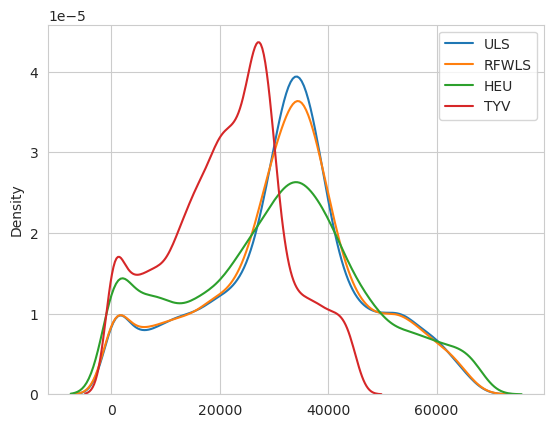

In [4]:
sns.kdeplot(uls, label='ULS')
sns.kdeplot(rfwls, label='RFWLS')
sns.kdeplot(heu, label='HEU')
sns.kdeplot(tyv, label='TYV')
plt.legend()

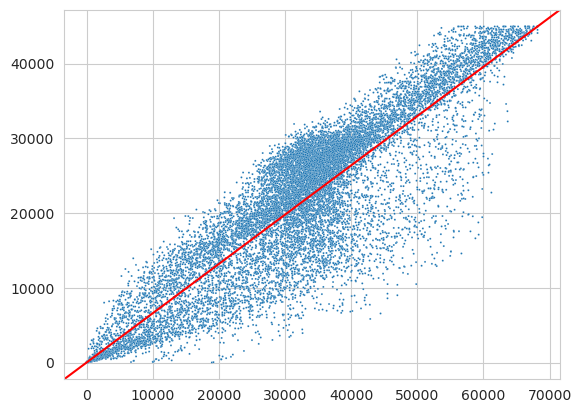

In [5]:
sns.scatterplot(x=uls, y=tyv, s=[2]*len(uls))
# draw a 45 degree line
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, color='red')

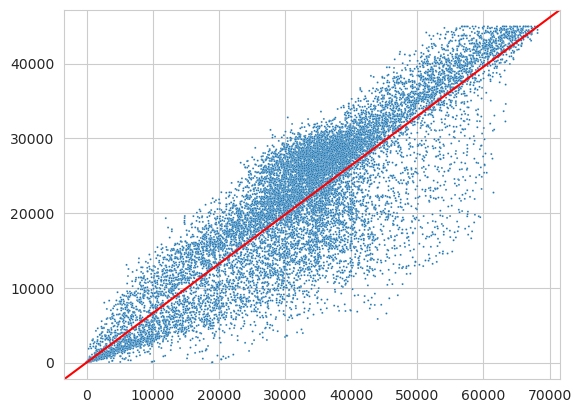

In [6]:
sns.scatterplot(x=rfwls, y=tyv, s=[2]*len(rfwls))
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, color='red')

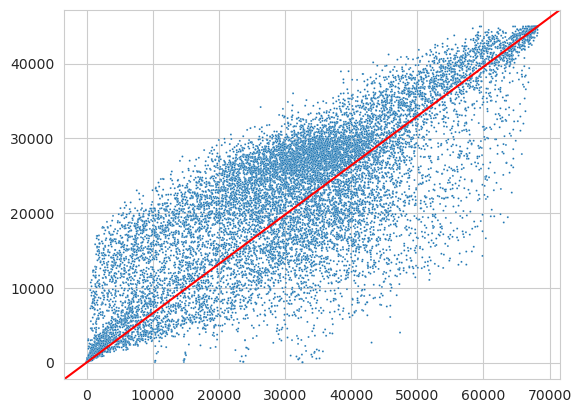

In [7]:
sns.scatterplot(x=heu, y=tyv, s=[2]*len(heu))
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, color='red')

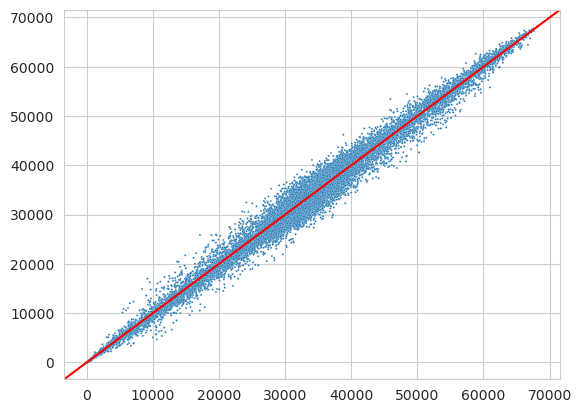

In [8]:
sns.scatterplot(x=uls, y=rfwls, s=[2]*len(uls))
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, color='red')

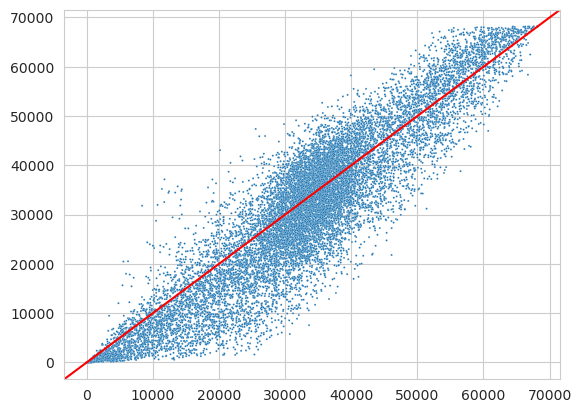

In [9]:
sns.scatterplot(x=uls, y=heu, s=[2]*len(uls))
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, color='red')

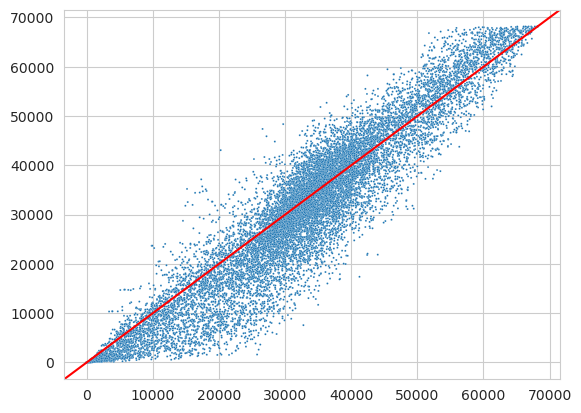

In [10]:
sns.scatterplot(x=rfwls, y=heu, s=[2]*len(rfwls))
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, color='red')

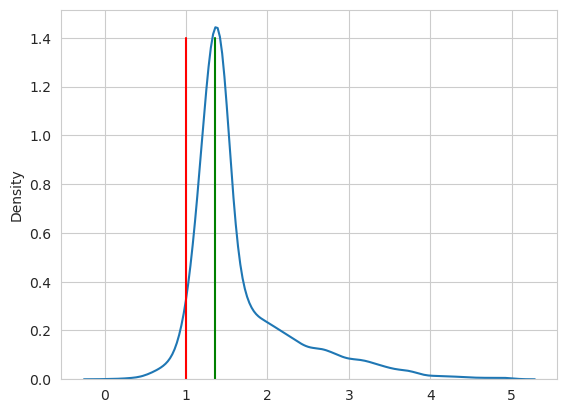

In [47]:
sns.kdeplot([x / y for x, y in zip(rfwls, tyv) if 0 < (x / y) < 5])
# plot x = 1
plt.plot([1, 1], [0, 1.4], color='red')
plt.plot([1.36, 1.36], [0, 1.4], color='green')

In [45]:
variance = [np.abs(x / y) for x, y in zip(rfwls, tyv)]
mean = np.mean(variance)
std = np.std(variance)
mean, std

(np.float64(1.8260006298614837), np.float64(8.404048934185205))

In [46]:
variance

[np.float64(1.3629862040326675),
 np.float64(1.4069403882494418),
 np.float64(1.2317255096966684),
 np.float64(1.3388642747516868),
 np.float64(3.2941176470588234),
 np.float64(1.632265774378585),
 np.float64(1.3685628602221076),
 np.float64(1.512400207851103),
 np.float64(1.926383981154299),
 np.float64(1.4789027149321268),
 np.float64(1.4152682508574228),
 np.float64(2.4465014577259474),
 np.float64(1.3521200125013022),
 np.float64(1.4367563653915771),
 np.float64(1.536158528516607),
 np.float64(1.3477576284069932),
 np.float64(1.696996996996997),
 np.float64(1.4884239592183517),
 np.float64(1.3347145022738758),
 np.float64(1.4803495160847928),
 np.float64(0.9179594272076372),
 np.float64(0.6611570247933884),
 np.float64(1.9374212515749685),
 np.float64(1.8683363591351707),
 np.float64(1.1957505350045858),
 np.float64(1.3767899761336515),
 np.float64(1.468015480052359),
 np.float64(1.7215379628879346),
 np.float64(0.8957464553794829),
 np.float64(1.2083314719678355),
 np.float64(2.15